___
<img style="float: right; margin: 0px 0px 15px 15px;" 
src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios
-superiores-de-occidente.png" width="150px" height="100px" />


# MICROESTRUCTURAS Y SISTEMAS DE "TRADING"
# LABORATORIO 3

## Nombres: Adrián García, Andres Ruvalcaba, Paulina Milenka, Hannia Lomelí

## Fecha: 24 de Octubre 2019

## Introducción

Dentro de este tercer laboratorio se busca analizar el histórico de movimientos de un trader con el fin de reconocer si el individuo se inclino a algun sesgo cognitivo en específico, nosotros decidimos escoger el **sesgo de confirmación**. 

### ¿Qué es un sesgo cognitivo?

Un sesgo cognitivo es un efecto psicológico que produce una desviación en el procesamiento mental, lo que lleva a una distorsión, juicio inexacto, interpretación ilógica, o lo que se llama en términos generales irracionalidad, que se da sobre la base de la interpretación de la información disponible, aunque los datos no sean lógicos o no estén relacionados entre sí.

### ¿Cuál es el sesgo de CONFIRMACIÓN?

Un sesgo de confirmación implica la tendencia a buscar y considerar de forma más intensa y selectiva aquella información que confirme lo que ya pensamos. Por lo tanto, interpretamos más positivamente aquellos hechos que básicamente respalden nuestras opiniones previas. Se trata de un prejuicio cognitivo que nos incita a seguir de acuerdo con nuestras creencias para así evitar entrar en contradicción con nosotros mismos.





### Ejemplo genérico 

Por ejemplo, imaginemos que una persona cree que los niños que toman leche materna son más inteligentes que los que toman leche artificial. Cada vez que esta persona se encuentre con un niño que saque altas puntuaciones académicas y haya sido amamantado de forma natural, le dará mayor importancia a esta “evidencia” que respalda lo que ya cree, obviando a su vez a aquellos que también obtienen muy buenas puntuaciones pero han tomado leche de sustitución. Este individuo incluso podría buscar pruebas científicas que respalden aún más este pensamiento, mientras descarta los ejemplos que no respaldan la idea.

<img style="float:center; margin: 0px 0px 15px 15px;" 
src="https://images.clarin.com/2015/03/19/HJQmd7anXl_1256x620.jpg" width="300px" height="200px" />

### Ejemplo aplicado a Trading

El sesgo de confirmación es la tendencia a buscar y sobrevalorar los datos que apoyen nuestra propia posición. Esto puede ser un problema importante en el trading, ya que lleva a los traders a confiarse en exceso con sus posiciones y apermanecer en operaciones mucho después de cuando debieran haber sido abandonadas. Un sencillo ejemplo es cuando los traders están en una posición y se centran principalmente en los indicadores o comportamientos del mercado que apoyan permanecer en la posición.

En tales casos, el stop-loss de una posición no será un conjunto de criterios planificados. Más probablemente el stop-loss será el dolor: la posición sólo se abandonará cuando se hace imposible mantener el sesgo de confirmación. Muy a menudo ese punto de dolor será un punto obvio de falta de confirmación, tal y como una ruptura a un nuevo máximo o mínimo.

<img style="float:center; margin: 0px 0px 15px 15px;" 
src="http://openmarkets.cmegroup.com/wp-content/uploads/web19OM0010-Trader_640x360.jpg" width="300px" height="200px" />


### Pasos para calcular nuestra función (Pseudo-código)
* 1.

* 2.

* 3.

* 4.

* 5.

* 6.

* 7.

* 8.

* 9.

* 10.



### Código completo

In [14]:
#Importamos librerías necesarias
import pandas as pd
import json
import numpy as np
import plotly.express as px
# Instalar plotly con la siguiente ruta: pip install plotly

In [15]:
# FUNCIÓN REALIZADA EN CLASE

#%% Opciones para visualizar data frames en consola

pd.set_option("display.max_rows",5000)
pd.set_option("display.max_columns",500)
pd.set_option("display.width",1000)

# Ingreso de datos de entrada: leer archivo JSON

archivo = "archivo_tradeview_0.json"

def f_datosent(P0_archivo="archivo_tradeview_0.json"):
    
    """
    param P0_archivio: Nombre del archivo con ubicación en la misma carpeta.
    """
    
    P1_tipo = P0_archivo.split(".")
    P1_tipo = P1_tipo[1]

    if P1_tipo=="json":
        with open(archivo, encoding="utf-8-sig") as json_file:
            datos_2 = json.load(json_file)["data"]
            
        df_datos = pd.DataFrame(datos_2["closedTransactions"]["list"])
        # Resetear index para tener todos los números de índices completos
        df_datos = df_datos.drop("info",axis=1).dropna().reset_index().drop("index",axis=1)
        
        # Tomar deseados
        df_datos = df_datos[(df_datos["type"]=="buy") | (df_datos["type"]=="sell") | (df_datos["type"]=="s/l") | (df_datos["type"]=="t/p")]
        
        # Renombrar
        
        df_datos.rename(columns  = {"SL":"sl","TP":"tp","price":"openPrice","price2":"closePrice","item":"instrument"},inplace=True) # Con inplace se guarda 
        
        return df_datos

    elif P1_tipo=="xlsx":
        
    
        df_datos = pd.read_excel(archivo)
        
        return df_datos
    
    elif P1_tipo=="csv":
        
        df_datos = pd.read_excel(archivo)
        
        return df_datos
    else:
        
        print("No manejamos tu tipo de extensión")
         
        
    
    
df_datos = f_datosent(P0_archivo=archivo)

## **NUESTRA FUNCIÓN:**

In [18]:
def f_sesgo_confirmacion(df_datos):
    
    #Convertir formatos de columnas a flotantes
    df_datos[['profit','size']] = df_datos[['profit','size']].astype(float) 

    lista1 =[]
    lista2 =[]
    h=list(df_datos.loc[:,'instrument'].unique()) #Aquí tomamos los elementos únicos de la columna de instrumentos - list
    h2=df_datos.loc[:,'instrument'].unique() #Lo mismo de arriba pero sin convertirla en lista
    
    #Creamos DataFrame
    x=[]
    for i in range(len(h)): # Ciclo for que recorra toda la lista h
        a=df_datos.where(df_datos.instrument == h[i]).dropna()[['instrument','size','profit']] # Quitamos los NA
        
        # Rezagamos profit y size
        a['sizet1']=a[['size']].shift(1)
        a['profit']=a[['profit']].shift(1)

        # Determinamos condicion con base a profit para saber si gano o perdion     
        condiciones = [a.profit<0,a.profit>0]
        elecciones =['perdió','ganó']
        # Return an array drawn from elements in choicelist, depending on conditions
        b=np.select(condiciones,elecciones)
        a['gano_perdio']=b
        #a.head()
    
        # Ciclo para determinar su variación en size
        c=[]
        for i in range(len(a[['size']])):
            if a.iloc[i,1] > a.iloc[i,3]:
                d = 'aumentó'
            elif a.iloc[i,1] < a.iloc[i,3]:
                d = 'disminuyó'
            elif a.iloc[i,1] == a.iloc[i,3]:
                d = 'mantuvo'
            else:
                d = 'na'
            c.append(d)

        a['com_size']=c


        # Juntamos las condiciones de profit & size para saber el comportamiento del trader 
        condiciones = [(a.gano_perdio=='ganó') & (a.com_size=='mantuvo'),(a.gano_perdio=='ganó') & (a.com_size=='aumentó'),
                      (a.gano_perdio=='ganó') & (a.com_size=='disminuyó'),(a.gano_perdio=='perdió') & (a.com_size=='aumentó'),
                      (a.gano_perdio=='perdió') & (a.com_size=='mantuvo'),(a.gano_perdio=='perdió') & (a.com_size=='disminuyó')]
        elecciones =['Razonable','Razonable','Sesgado','Sesgado','Sesgado','Razonable']

        b=np.select(condiciones,elecciones)

        a['Comportamiento']=b
        a=a.iloc[1:]    

        # Ordenamos la info en dos tablas
        tabla1 = a.pivot_table(index='gano_perdio', columns=['instrument','com_size'], aggfunc={'com_size':len})
        tabla2 = a.pivot_table(columns=['instrument','Comportamiento'], aggfunc={'Comportamiento':len})

        # Las mostramos como listas
        lista1.append(tabla1)
        lista2.append(tabla2)
        
    return lista1, lista2

### **A continuación mando a llamar la función y presento DATOS:**

In [31]:
funcion = f_sesgo_confirmacion(df_datos)
funcion

([            com_size        
  instrument    usdmxn        
  com_size     aumentó mantuvo
  gano_perdio                 
  ganó             2.0     1.0
  perdió           NaN     2.0,             com_size
  instrument    usdjpy
  com_size     aumentó
  gano_perdio         
  ganó               1
  perdió             1,             com_size                  
  instrument    usdcad                  
  com_size     aumentó disminuyó mantuvo
  gano_perdio                           
  ganó             NaN       NaN     2.0
  perdió           2.0       1.0     3.0,             com_size                  
  instrument    xauusd                  
  com_size     aumentó disminuyó mantuvo
  gano_perdio                           
  ganó             1.0       1.0     1.0
  perdió           2.0       NaN     1.0,             com_size                  
  instrument    eurusd                  
  com_size     aumentó disminuyó mantuvo
  gano_perdio                           
  ganó               2  

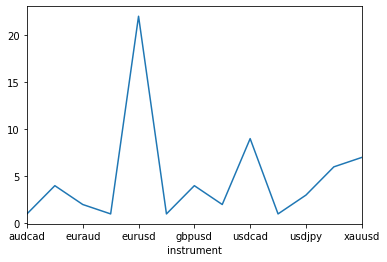

In [42]:
# GRAFICAR ALGO ASI PERO CON PLOTLY
a = (df_datos.pivot_table(columns=['instrument'],aggfunc={'instrument':len}))
a1 = pd.DataFrame(a)
h = a1.iloc[0,:]
h.plot()

In [41]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(y=[1,4,2,1,22,1,4,2,9,1,3,6,7])],layout_title_text="Paridades en las que más invirtio")
fig.show()